1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


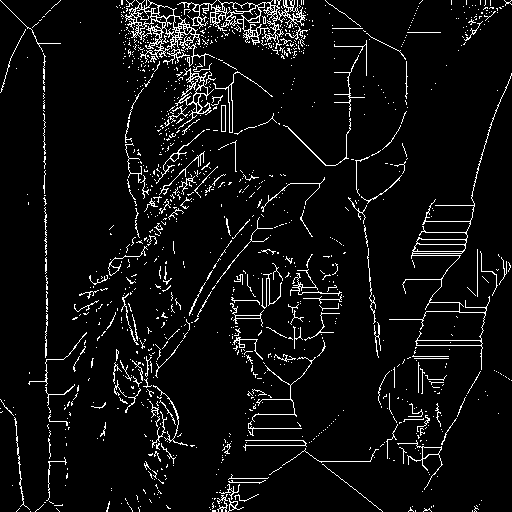

In [7]:
from PIL import Image, ImageDraw
import numpy as np

    
def interior_border(matrix): # 1=border 2=interior
    i_b_matrix = np.zeros((514,514),dtype=int)
    for i in range(1,513):
        for j in range(1,513):
            x0 = matrix[i][j]
            x1 = matrix[i][j+1]
            x2 = matrix[i-1][j]
            x3 = matrix[i][j-1]
            x4 = matrix[i+1][j]
            #x5 = matrix[i+1][j+1]
            #x6 = matrix[i-1][j+1]
            #x7 = matrix[i-1][j-1]
            #x8 = matrix[i+1][j-1]
            
            if x0==255:
                if x1==x2==x3==x4==255:
                    i_b_matrix[i][j] = 2
                else:
                    i_b_matrix[i][j] = 1                                 
    return i_b_matrix

def Pair(matrix): # 1=p 2=q
    Pair_matrix = np.zeros((514,514),dtype=int)
    for i in range(1,513):
        for j in range(1,513):
            x0 = matrix[i][j]
            x1 = matrix[i][j+1]
            x2 = matrix[i-1][j]
            x3 = matrix[i][j-1]
            x4 = matrix[i+1][j]
            
            if x0==1:
                if x1==2 or x2==2 or x3==2 or x4==2:
                    Pair_matrix[i][j]=1
    return Pair_matrix


def h3(b,c,d,e):
    if b==c and(b!=d or b!=e):
        return 1
    else:
        return 0

def f3(a1,a2,a3,a4,x0):
    if (a1+a2+a3+a4==1):
        return 1
    else:
        return 0

def Connected_Shrink(matrix):
    Connected_Shrink_matrix = np.zeros((514,514),dtype=int)
    for i in range(1,513):
        for j in range(1,513):
            if matrix[i][j]==255:
                x0 = matrix[i][j]
                x1 = matrix[i][j+1]
                x2 = matrix[i-1][j]
                x3 = matrix[i][j-1]
                x4 = matrix[i+1][j]
                x5 = matrix[i+1][j+1]
                x6 = matrix[i-1][j+1]
                x7 = matrix[i-1][j-1]
                x8 = matrix[i+1][j-1]
                
                a1 = h3(x0, x1, x6, x2)
                a2 = h3(x0, x2, x7, x3)
                a3 = h3(x0, x3, x8, x4)
                a4 = h3(x0, x4, x5, x1)
                Connected_Shrink_matrix[i][j] = f3(a1,a2,a3,a4,x0)
    return Connected_Shrink_matrix
'''
7 2 6
3 0 1
8 4 5
'''




lena=Image.open("lena.bmp")
matrix = np.array(lena)
pix=lena.load()
coulmn,row=lena.size
binary_matrix = np.zeros((514,514),dtype=int)
for i in range(512):
    for j in range(512):
        if matrix[i,j] < 128:
            binary_matrix[j+1][i+1] = 0
        else:
            binary_matrix[j+1][i+1] = 255 

change=1
iter_cnt=1
while(change):
    print(iter_cnt)
    iter_cnt += 1
    change=0
    i_b_matrix = interior_border(binary_matrix)
    Pair_matrix = Pair(i_b_matrix)
    Connected_Shrink_matrix=Connected_Shrink(binary_matrix)
    for i in range(1,513):
        for j in range(1,513):
            if (Pair_matrix[i][j]==1) and (Connected_Shrink_matrix[i][j]==1) :
                binary_matrix[i][j]=0
                change=1
    
image=Image.new(lena.mode,(512,512))
for i in range(1,513):
    for j in range(1,513):
        if binary_matrix[i][j]==255:
            image.putpixel((i-1,j-1),255)
image.save('thinning.bmp')
image